In [1]:
import os
os.chdir('../')

In [3]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter
import phylovelo as pv
from scipy.stats import spearmanr
from Bio import Phylo

/home/wangkun/LineageTracingwithscRNA/phylovelo/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter

In [5]:
import scvelo as scv
import loompy

In [6]:
adata = scv.read("/raid/wangkun/emt/combined.loom",cache=True)
sample1 = pd.read_csv("/raid/wangkun/emt/scRNA_raw_counts.csv",sep=',',header=0,index_col=0)
sample1_metadata = pd.read_csv("/raid/wangkun/emt/scRNA_metadata.csv",sep=',',header=0,index_col=0)
cells = sample1.columns.to_list()
# cells = [i.replace("-1","x") if '-1' in i else i for i in cells]
# cells = [i.replace("PT_","SRR14436657:") if 'PT_' in i else i for i in cells]
# cells = [i.replace("PTab_","SRR14436659:") if 'PTab_' in i else i for i in cells]
# cells = [i.replace("Met_","SRR14436661:") if 'Met_' in i else i for i in cells]
# cells = [i.replace("Liver_","SRR14436663:") if 'Liver_' in i else i for i in cells]
# cells = [i.replace("Lung_","SRR14436665:") if 'Lung' in i else i for i in cells]
# cells = [i.replace("Blood_","SRR14436667:") if 'Blood_' in i else i for i in cells]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
cells = [i.replace("-1","x").replace("PT_","SRR14436657:").replace("PTab_","SRR14436659:").replace("Met_","SRR14436661:").replace("Liver_","SRR14436663:").replace("Lung_","SRR14436665:").replace("Blood_","SRR14436667:") for i in cells]

In [8]:
sample1_adata = adata[cells,:]
sample1_adata.obs["emt_pseudotime"] = sample1_metadata["pseudotime"].to_list()

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
scv.pp.filter_and_normalize(sample1_adata,min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(sample1_adata,n_pcs=30, n_neighbors=30)  #calculate the first and second order moments
scv.tl.louvain(sample1_adata)
scv.tl.umap(sample1_adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 24837 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


recovering dynamics (using 10/160 cores)


  0%|          | 0/975 [00:00<?, ?gene/s]

    finished (0:00:13) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/160 cores)


  0%|          | 0/601 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


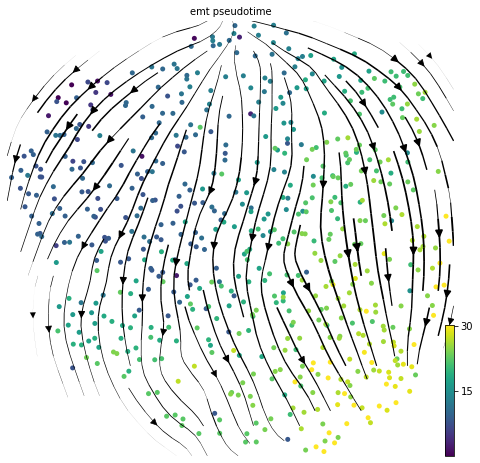

In [10]:
scv.tl.recover_dynamics(sample1_adata,n_jobs=10)
scv.tl.velocity(sample1_adata,mode="dynamical")
scv.tl.velocity_graph(sample1_adata)
scv.pl.velocity_embedding_stream(sample1_adata, basis='X_umap',color="emt_pseudotime",figsize=[8, 8],s=100,alpha=1,density=1,arrow_size=1.5,smooth=1)

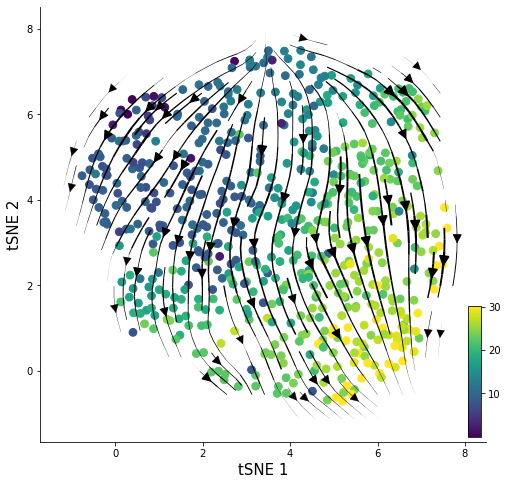

In [422]:
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(sd.Xdr.iloc[:,0], sd.Xdr.iloc[:,1], s=60, c=sample1_adata.obs["emt_pseudotime"])
ax = velocity_plot(sd.Xdr.to_numpy(), sample1_adata.obsm['velocity_umap'], ax, 'stream',streamdensity=1.1, radius=0.5, lw_coef=100, arrowsize=2)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
# cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
# plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.set_xlim(-1.7333560658060796, 8.481657745286222)
ax.set_ylim(-1.6626300068643953, 8.51053075389226)
plt.savefig('./figures/EMT/scvelo_stream.pdf', dpi='figure', format='pdf')

In [11]:
x_normed = adata[cells,:]
scv.pp.filter_and_normalize(x_normed, min_shared_counts=10)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23686 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [12]:
tree = Phylo.read('../datas/EMT/emt_collapsed.nwk', 'newick')
count = adata[cells,:]

sd = pv.data_struct.scData()
sd.phylo_tree = tree
sd.cell_names = cells
sd.count = pd.DataFrame(data=count.X.A, columns=count.var_names, index=cells)
sd.Xdr = pd.DataFrame(data=sample1_adata.obsm['X_umap'], index=sample1_adata.obs_names)
sd.Xdr = sd.Xdr.loc[cells]
scv.pp.filter_and_normalize(count, min_shared_counts=10)
sd.x_normed = pd.DataFrame(data=count.X.A, columns=count.var_names, index=cells)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23686 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [13]:
name_id_map = pd.DataFrame(data=[f'N{i}' for i in sample1_metadata['index']], index=[re.findall('(?<=\_)[AGCT]+(?=-)', i)[0] for i in sample1_metadata.index])
depths = [sd.phylo_tree.depths()[sd.phylo_tree.find_any(name=name_id_map.loc[re.findall('(?<=\:)[AGCT]+(?=x)', i)[0]].to_numpy()[0])] for i in sd.count.index]

In [14]:
sd = pv.inference.velocity_inference(sd, depths, cutoff=0.95, target='x_normed')

  0%|          | 0/8599 [00:00<?, ?it/s]

In [15]:
sd = pv.embedding.velocity_embedding(sd, target='x_normed')

  0%|          | 0/601 [00:00<?, ?it/s]

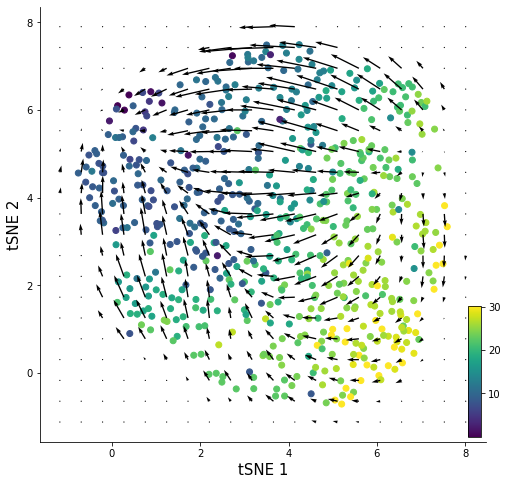

In [269]:
fig, ax = plt.subplots()
scatter = ax.scatter(sd.Xdr.iloc[:,0], sd.Xdr.iloc[:,1], c=sample1_adata.obs["emt_pseudotime"])
ax = velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'grid',streamdensity=0.8, radius=0.8)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
# cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
# plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')

# plt.savefig('./figures/EMT/EMT_grid_velo.pdf', dpi='figure', format='pdf')

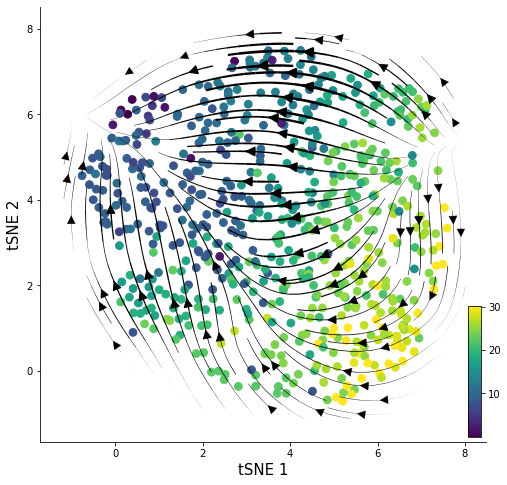

In [418]:
fig, ax = plt.subplots()
scatter=ax.scatter(sd.Xdr.iloc[:,0], sd.Xdr.iloc[:,1], s=60, c=sample1_adata.obs["emt_pseudotime"])
ax = velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream',streamdensity=1.2, radius=0.8, lw_coef=3000, arrowsize=2)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
# cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
# plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')

# plt.savefig('./figures/EMT/EMT_stream.pdf', dpi='figure', format='pdf')

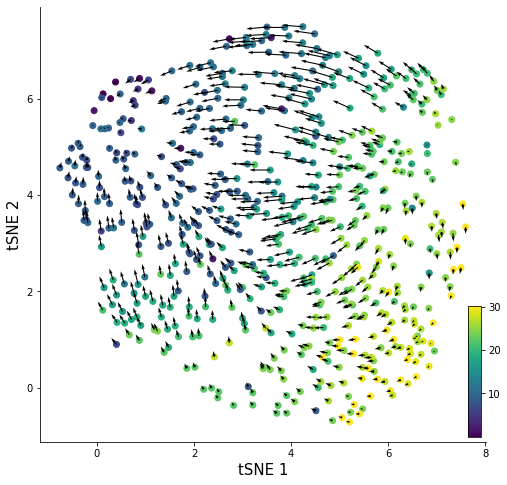

In [204]:
fig, ax = plt.subplots()
scatter=ax.scatter(sd.Xdr.iloc[:,0], sd.Xdr.iloc[:,1], c=sample1_adata.obs["emt_pseudotime"])
ax = velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'point')
ax.figure.set_size_inches(8,8)
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
# cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
# plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')

plt.savefig('./figures/EMT/EMT_quiver.pdf', dpi='figure', format='pdf')

In [188]:
import pseudo_time
imp.reload(pseudo_time)
from pseudo_time import calc_phylo_pseudotime

In [189]:
sd = calc_phylo_pseudotime(sd, n_neighbors=30)

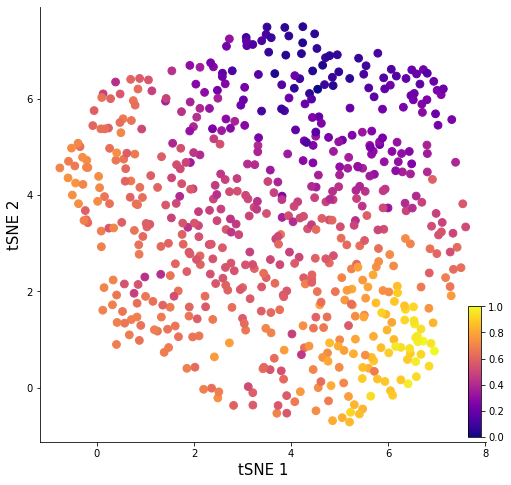

In [322]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(8,8)
scatter = ax.scatter(sd.Xdr.iloc[:,0], sd.Xdr.iloc[:,1], s=60, c=sample1_adata.obs["latent_time"],cmap='plasma')
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')

plt.savefig('./figures/EMT/latent_time.pdf', dpi='figure', format='pdf')

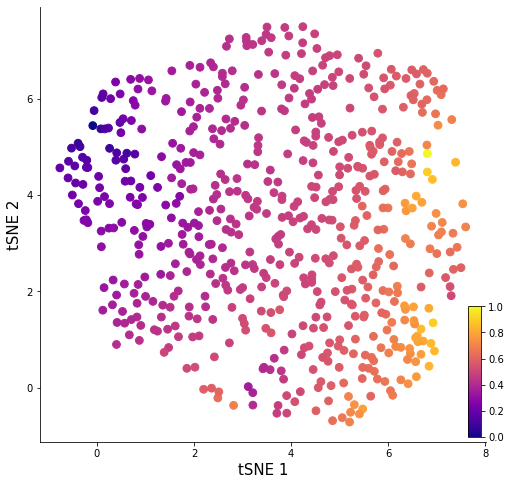

In [323]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(8,8)
scatter = ax.scatter(sd.Xdr.iloc[:,0], sd.Xdr.iloc[:,1], s=60, c=sd.phylo_pseudotime,cmap='plasma')
ax.set_xlabel('tSNE 1', fontsize=15)
ax.set_ylabel('tSNE 2', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')

plt.savefig('./figures/EMT/phylo_pseudotime.pdf', dpi='figure', format='pdf')

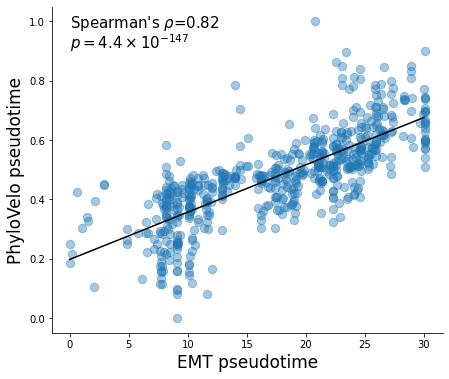

In [416]:

x = sample1_adata.obs["emt_pseudotime"]
y = sd.phylo_pseudotime

a, b = np.polyfit(x, y, deg=1)
y_est = a * np.linspace(0,30,60) + b

fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(x, y, alpha=0.4, s=70)
ax.plot(np.linspace(0,30,60), y_est, '-', c='k')
ax.set_xlabel('EMT pseudotime', fontsize=17)
ax.set_ylabel('PhyloVelo pseudotime', fontsize=17)
# ax.text(0, 0.9, 'spearmanr={:.2g}\np_val={:.2g}'.format(*spearmanr(x, y)), fontsize=15)
rho, pval = spearmanr(x, y)
ax.text(0, 0.98, r"Spearman's $\rho$={:.2g}".format(rho), fontsize=15)
ax.text(0, 0.91, r'$p={}\times 10^{}$'.format(*r'{:.2g}'.format(pval).split('e')).replace('^', '^{').replace('$', '}$')[1:], fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig('./figures/EMT/phylopseudotime_cmp.pdf', dpi='figure', format='pdf')


computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/EMT/latenttime.pdf


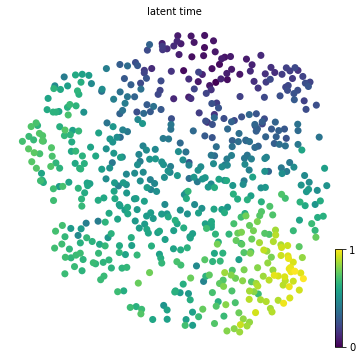

In [219]:
scv.tl.latent_time(sample1_adata)
scv.pl.scatter(sample1_adata, color='latent_time', color_map='viridis', basis='X_umap', figsize=(6,6), save='./figures/EMT/latenttime.pdf')

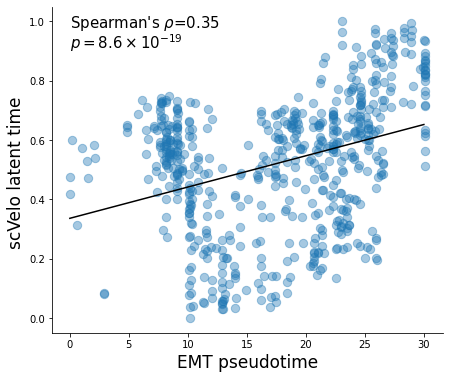

In [417]:

x = sample1_adata.obs["emt_pseudotime"]
y = sample1_adata.obs.latent_time

a, b = np.polyfit(x, y, deg=1)
y_est = a * np.linspace(0,30,60) + b

fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(x, y, alpha=0.4, s=70)
ax.plot(np.linspace(0,30,60), y_est, '-', c='k')
ax.set_xlabel('EMT pseudotime', fontsize=17)
ax.set_ylabel('scVelo latent time ', fontsize=17)
rho, pval = spearmanr(x, y)
ax.text(0, 0.98, r"Spearman's $\rho$={:.2g}".format(rho), fontsize=15)
ax.text(0, 0.91, r'$p={}\times 10^{}$'.format(*r'{:.2g}'.format(pval).split('e')).replace('^', '^{').replace('$', '}$')[1:], fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig('./figures/EMT/latenttime_cmp.pdf', dpi='figure', format='pdf')


In [617]:
from sklearn.preprocessing import scale
import seaborn as sns

gene_vel_map = pd.DataFrame(data=sd.velocity, index=sd.x_normed.columns)
corrs = []
genelist = []
for i in list(gene_vel_map.index[sd.velocity!=0]):
    genelist.append(i)
    x = np.array(depths)
    y = sd.x_normed[i]
    corrs.append(spearmanr(x,y)[0])
corrs = np.array(corrs)
genelist = np.array(genelist)

genes1 = genelist[corrs>0][np.argsort(scale(sd.x_normed[genes1], axis=0).sum(0))]
genes2 = genelist[corrs<0][np.argsort(scale(sd.x_normed[genes2], axis=0).sum(0))]
genes1 = genes1[::-1]


genetraj1 = []
for i in genes1:
    genetraj1.append(scale(list(sd.x_normed[i][np.argsort(sd.phylo_pseudotime)])))
genetraj1 = np.array(genetraj1)
# genetraj1 = np.log(1+genetraj1)
# genetraj1 = (genetraj1.T / np.max(genetraj1, axis=1)).T

genetraj2 = []
for i in genes2:
    genetraj2.append(scale(list(sd.x_normed[i][np.argsort(sd.phylo_pseudotime)])))
genetraj2 = np.array(genetraj2)
# genetraj2 = np.log(1+genetraj2)
# genetraj2 = (genetraj2.T / np.max(genetraj2, axis=1)).T

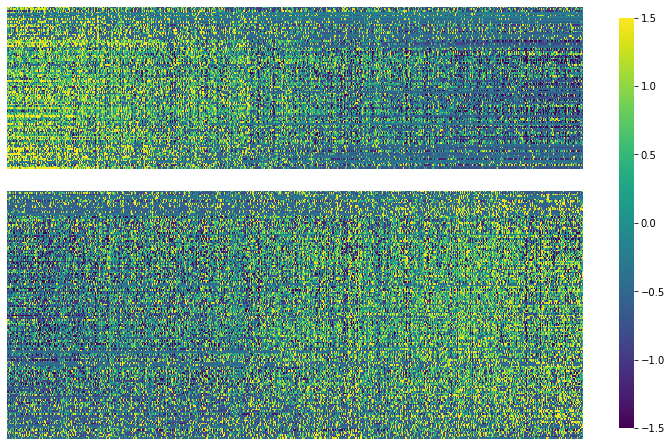

In [618]:
fig = plt.figure(figsize=(10, 6))
h1 = len(genes1)/(len(genes1)+len(genes2))
h2 = len(genes2)/(len(genes1)+len(genes2))
ax1 = plt.axes([0.05, 0, 0.8, 0.95*h1])
ax2 = plt.axes([0.05, 0.95*h1+0.05, 0.8, 0.95*h2])
ax3 = plt.axes([0.9,0.025,0.02,0.95])

ax1 = sns.heatmap(genetraj1, cmap='viridis', ax=ax1, cbar_ax=ax3,vmax=1.5, vmin=-1.5, xticklabels=False, yticklabels='')
ax2 = sns.heatmap(genetraj2[::-1], cmap='viridis', ax=ax2, cbar=False,vmax=1.5, vmin=-1.5, xticklabels=False, yticklabels='')

plt.savefig('./figures/EMT/heatmap_full_phylopseudotime.pdf', dpi='figure', format='pdf')